## Исследование данных о российском кинопрокате



Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделим внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

_В ходе исследования будем следовать следующим шагам:_


**Шаг 1. Откроем файлы с данными и объединим их в один датафрейм**

Объединим данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм. 


mkrf_movies.csv — данные о прокатных удостоверениях. 


mkrf_shows.csv — данные о прокате в российских кинотеатрах. 



**Шаг 2. Предобработка данных**
- Проверим типы данных в датафрейме и преобразуем там, где это необходимо.
- Изучим пропуски в датафрейме. Объясним, почему заполнили пропуски определённым образом или почему не стали это делать.
- Проверим, есть ли в данных дубликаты. Опишим причины, которые могли повлиять на появление дублей.
- Изучим столбцы, которые содержат категориальные значения:
- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения.
- Изучим столбцы, которые хранят количественные значения. Проверим, обнаружились ли в таких столбцах подозрительные данные. Выясним как с такими данными лучше поступить.


_Добавим новые столбцы:_
- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма;
- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно;
- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.


**Шаг 3. Проведем исследовательский анализ данных**
- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.
- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года. Сравним значения и сделаем выводы.
- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.



**Шаг 4. Исследуем фильмы, которые получили государственную поддержку**
- Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг. 



**Шаг 5. Напишем общий вывод**

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Объединим данные таким образом, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.** 
- Пути к файлам: 
 - /datasets/mkrf_movies.csv — данные о прокатных удостоверениях. 
 - /datasets/mkrf_shows.csv — данные о прокате в российских кинотеатрах.

**Для начала изучим общую информацию о наших датасетах:** 

In [2]:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
display(mkrf_movies.head())
display(mkrf_movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

None

In [3]:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')
display(mkrf_shows.head())
display(mkrf_shows.info())

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


None

_**puNumber в датасете mkrf_movies имеет тип - object, а в датасете mkrf_shows - int64. Приведем их к одному типу, чтобы получилось выполнить объединение данных:**_

In [4]:
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce')
# если errors='coerce', то некорректные значения принудительно заменяются на NaN;

**Теперь мы можем добавить в датафрейм с фильмами сведения о показах.**

In [5]:
mkrf_movies = mkrf_movies.merge(mkrf_shows, how='left')
display(mkrf_movies.head())
display(mkrf_movies.info())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915.0,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716.0,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416.0,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

None

Отлично! Все 3158 значений присоединены без потерь.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [6]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7485 non-null   float64
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

_**Столбец show_start_date у нас типа object, исправим это и преобразуем его к типу - datetime.**_

In [7]:
mkrf_movies['show_start_date']=pd.to_datetime(mkrf_movies['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

_**Столбец ratings у нас типа object, исправим это и преобразуем его к типу - float64. Ведь рейтинг фильма на КиноПоиске меняется у нас от 1 до 10.**_

In [8]:
mkrf_movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

**Видим, что у нас есть рейтинг в процентах, преобразуем их в числовой формат.**

In [9]:
#mkrf_movies['ratings'] = mkrf_movies['ratings'].replace(['99%', '28%', '97%', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       #'19%', '88%', '89%', '98%'],[9.9, 2.8, 9.7, 8.3, 6.4, 9.1, 9.4, 6.2, 7.9, 9.0, 1.9, 8.8, 8.9, 9.8])

In [10]:
mkrf_movies['ratings'] = mkrf_movies['ratings'].str.replace('%', '').astype(float)

In [11]:
mkrf_movies['ratings'] = pd.to_numeric(mkrf_movies['ratings'])
mkrf_movies['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [12]:
mkrf_movies['ratings'] = mkrf_movies['ratings'].apply(lambda rating: rating / 10 if 10 <= rating <= 100 else rating)

In [13]:
mkrf_movies['ratings'].describe()[['min', 'max']]

min    1.0
max    9.9
Name: ratings, dtype: float64

In [14]:
mkrf_movies['ratings'].dtypes

dtype('float64')

#### Шаг 2.2. Изучим пропуски в датафрейме

- Объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

_**Посчитаем процент и количество пропущенных значений по каждому столбцу**_

In [15]:
(mkrf_movies.isnull().mean() * 100).round()

title                     0.0
puNumber                  0.0
show_start_date           0.0
type                      0.0
film_studio               0.0
production_country        0.0
director                  0.0
producer                  8.0
age_restriction           0.0
refundable_support       96.0
nonrefundable_support    96.0
budget                   96.0
financing_source         96.0
ratings                  13.0
genres                   13.0
box_office               58.0
dtype: float64

In [16]:
mkrf_movies.isnull().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Больше всего пропущенных значений у нас в столбцах:  
- refundable_support 
- nonrefundable_support
- budget
- financing_source

refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма.

Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

Можно сказать, что пропуски в этих столбцах связаны с тем, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Заменить их чем-то у нас не получится. 

_**Разберемся с остальными пропусками:**_

**Столбец film_studio** - студия-производитель:

In [17]:
display(mkrf_movies[mkrf_movies['film_studio'].isna() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114.0,2014-06-03 12:00:00,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410.0,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6105,Значит любит,111013818.0,2018-08-10 12:00:00,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018.0,2018-09-01 12:00:00,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818.0,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918.0,2018-11-15 12:00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918.0,2018-11-15 12:00:00,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6485,До и После,112014418.0,2018-12-05 12:00:00,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018.0,2018-12-05 12:00:00,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918.0,2018-12-06 12:00:00,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Здесь так же оставим пропуски, вероятнее всего, что эти фильмы финансировались авторами, а не студиями.*

**Столбец production_country** - страна-производитель:

In [18]:
display(mkrf_movies[mkrf_movies['production_country'].isna() == True])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216.0,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410.0,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


*Здесь у нас всего лишь два пропуска. Очевидно, что страна производитель этих кинофильмов - Россия. Исправим это.*

In [19]:
mkrf_movies.loc[mkrf_movies['production_country'].isna() == True, 'production_country'] = 'Россия'

**Остальные пропуски оставим без изменений, в процентном соотношении их не так много, на исследование они сильно не повлияют, заменить их мы ничем не сможем, как и удалить.**

In [20]:
# Код ревьюера
mkrf_movies.isna().sum()

title                       0
puNumber                    1
show_start_date             0
type                        0
film_studio                18
production_country          0
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

**Проверим на наличие явных дубликатов:**

In [21]:
mkrf_movies.duplicated().sum()

0

Таких в нашем наборе данных не нашлось.

**Изучим количество дубликатов в каждом столбце:**

In [22]:
for column in mkrf_movies.columns:
    duplicates_count = mkrf_movies[column].duplicated().sum()
    print(f"Количество дубликатов в столбце '{column}': {duplicates_count}")

Количество дубликатов в столбце 'title': 714
Количество дубликатов в столбце 'puNumber': 2
Количество дубликатов в столбце 'show_start_date': 5521
Количество дубликатов в столбце 'type': 7478
Количество дубликатов в столбце 'film_studio': 1995
Количество дубликатов в столбце 'production_country': 6536
Количество дубликатов в столбце 'director': 2674
Количество дубликатов в столбце 'producer': 2136
Количество дубликатов в столбце 'age_restriction': 7481
Количество дубликатов в столбце 'refundable_support': 7451
Количество дубликатов в столбце 'nonrefundable_support': 7410
Количество дубликатов в столбце 'budget': 7195
Количество дубликатов в столбце 'financing_source': 7482
Количество дубликатов в столбце 'ratings': 7401
Количество дубликатов в столбце 'genres': 6743
Количество дубликатов в столбце 'box_office': 4547


Нас интересуют отсюда только столбцы title — название фильма; и puNumber — номер прокатного удостоверения. В остальных столбцах наличие дубликатов нормальное условие. 

In [23]:
mkrf_movies[mkrf_movies['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416.0,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916.0,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815.0,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415.0,2015-04-03 12:00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.1,"драма,спорт",NaN
26,Оружейный барон,221012515.0,2015-04-03 12:00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.7,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319.0,2019-11-07 12:00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119.0,2019-12-13 12:00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919.0,2019-12-05 12:00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.5,"триллер,драма",175003.51
7450,В тихом омуте,121036919.0,2019-12-09 12:00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"триллер,криминал,детектив",NaN


In [24]:
mkrf_movies[mkrf_movies['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310.0,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310.0,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410.0,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410.0,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


In [25]:
mkrf_movies[mkrf_movies['title'] == mkrf_movies.loc[4638, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510.0,2010-12-03 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221154310.0,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [26]:
mkrf_movies[mkrf_movies['title'] == mkrf_movies.loc[4638, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4520,Как жениться и остаться холостым,221142510.0,2010-12-03 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,Как жениться и остаться холостым,221154310.0,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN


In [27]:
mkrf_movies[mkrf_movies['title'] == mkrf_movies.loc[5067, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4553,Анализируй это!,221147310.0,2010-12-15 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,Анализируй это!,221054410.0,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN


In [28]:
mkrf_movies[mkrf_movies['title'] == mkrf_movies.loc[5068, 'title']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5068,Анализируй то!,221054410.0,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**Вывод:**

Явных дубликатов у нас нет. Есть повторяющиеся значения в названиях фильмов, это связано с тем, что одному и тому же фильму выдавали разные прокатные удостоверения. Также есть повторы и в номерах прокатных удостоверений, это скорее всего связано с тем, что под одним удостоверением выходило в прокат несколько фильмов, такое возможно из-за незначительного разного перевода названия фильма, как вариант. Но в описании данных у нас говорится, что у одного фильма может быть несколько прокатных удостоверений.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.


**У нас есть 3 категориальных столбца: type, age_restriction, genres.
Изучим каждый из них.**

In [29]:
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Заметим, что в столбце type есть несколько значений, у которых есть пробел в начале строки. Исправим это.

In [30]:
mkrf_movies['type'] = mkrf_movies['type'].str.strip()

In [31]:
mkrf_movies['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Столбец age_restriction:

In [32]:
mkrf_movies['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

Здесь все в порядке

Столбец genres:

In [33]:
mkrf_movies['genres'].unique()

array(['боевик,драма,мелодрама', 'драма,военный',
       'фантастика,боевик,триллер', 'драма', 'мелодрама,комедия',
       'мюзикл,мелодрама,комедия', 'комедия,криминал',
       'боевик,триллер,детектив', 'боевик,драма,приключения',
       'драма,спорт', 'триллер,драма,мелодрама', 'комедия,мелодрама',
       'драма,мелодрама,комедия', 'драма,мелодрама', 'драма,история',
       'драма,мелодрама,семейный', 'комедия,мелодрама,криминал',
       'комедия', 'боевик,драма,криминал', 'драма,комедия',
       'ужасы,фантастика,комедия', 'мультфильм,короткометражка,мелодрама',
       'драма,криминал', 'мультфильм,фантастика,фэнтези',
       'триллер,драма,криминал', 'драма,мелодрама,биография',
       'драма,комедия,военный', 'фантастика,драма,детектив',
       'мюзикл,семейный', nan, 'военный,приключения,драма',
       'документальный,драма', 'драма,биография,история',
       'боевик,триллер,драма', 'фэнтези,боевик',
       'боевик,комедия,криминал', 'мюзикл,комедия,детский',
       'комедия,мел

**Вывод:**


В столбце type были лишние пробелы в начале, исправили это. А общая проблема, которая встречается почти во всех категориальных столбцах - это то, что категории зачастую используются совместно друг с другом. К примеру, 'драма'; 'драма,ужасы'. 

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные.



**Обратим внимание на описание столбца budget — общий бюджет фильма и на то, как этот столбец соотносится с двумя другими: refundable_support — объём возвратных средств государственной поддержки и nonrefundable_support — объём невозвратных средств государственной поддержки.**

Столбец "budget" (общий бюджет фильма) должен быть равен сумме столбцов "refundable_support" (объём возвратных средств государственной поддержки) и "nonrefundable_support" (объём невозвратных средств государственной поддержки).

То есть, соотношение между этими столбцами должно быть следующим:

budget = refundable_support + nonrefundable_support

Это означает, что общий бюджет фильма состоит из двух частей: возвратных и невозвратных средств государственной поддержки. 

_**Проверим фильмы, у которых бюджет меньше суммы возвратных и невозвратных средств государственной поддержки.**_

In [34]:
mkrf_movies[(mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) > mkrf_movies['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614.0,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07
2058,Дуxless 2,111000415.0,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08
2472,Воин (2015),111017315.0,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08
2532,Бармен.,111009615.0,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07
2615,Савва. Сердце воина,114001715.0,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08
2684,Тряпичный союз,111010215.0,2015-06-08 12:00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06
2788,Срочно выйду замуж,111017115.0,2015-09-30 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07
2874,Помню - не помню!,111004916.0,2016-03-01 12:00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07
3047,Любовь с ограничениями,111008216.0,2016-04-29 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07
3565,Притяжение (2016),111018116.0,2016-12-16 12:00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09


Исправим бюджет этих фильмов так, чтобы соотношение было следующим:

budget = refundable_support + nonrefundable_support

In [35]:
def correct_budget(row):
    if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
        row['budget'] = (row['refundable_support'] + row['nonrefundable_support'])
    return row['budget']

In [36]:
mkrf_movies['budget'] = mkrf_movies.apply(correct_budget, axis=1)

Проверим применились ли изменения:

In [37]:
len(mkrf_movies[(mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) > mkrf_movies['budget']])

0

**Изменения применились, исправили фильмы с нулевым общим бюджетом так, чтобы он состоял из двух частей: возвратных и невозвратных средств государственной поддержки.**

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [38]:
mkrf_movies['film_release_year'] = mkrf_movies['show_start_date'].dt.year
display(mkrf_movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year
0,Открытый простор,221048915.0,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716.0,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016
2,Особо опасен,221038416.0,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916.0,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815.0,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



In [39]:
mkrf_movies['general_director'] = mkrf_movies['director'].str.split(',', n = 1, expand = True)[0]
mkrf_movies['general_genres'] = mkrf_movies['genres'].str.split(',', n = 1, expand = True)[0]

In [40]:
display(mkrf_movies.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres
0,Открытый простор,221048915.0,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716.0,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416.0,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916.0,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815.0,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
mkrf_movies['share_total_budget'] = (mkrf_movies['refundable_support'] + mkrf_movies['nonrefundable_support']) / mkrf_movies['budget']

In [42]:
mkrf_movies['share_total_budget'].describe()

count    332.000000
mean       0.542098
std        0.196925
min        0.044043
25%        0.384615
50%        0.614038
75%        0.661412
max        1.000000
Name: share_total_budget, dtype: float64

*Если судить по медианному значению, то от общего бюджета фильма  государственная поддержка составляет около 61%.*

**Вывод:**
- Создали столбец с информацией о годе проката. Выделили год из даты премьеры фильма.
- Создали два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы вошли первые значения из списка режиссёров и жанров соответственно.
- Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка.

In [43]:
# Код ревьюера
mkrf_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget
0,Открытый простор,221048915.0,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716.0,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416.0,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN


### Шаг 3. Проведем исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

**Посмотрим, сколько фильмов выходило в прокат каждый год:**

In [44]:
mkrf_movies['film_release_year'].value_counts().sort_values(ascending=True)

2017    505
2012    593
2011    622
2013    630
2015    705
2014    807
2016    818
2018    891
2019    930
2010    985
Name: film_release_year, dtype: int64

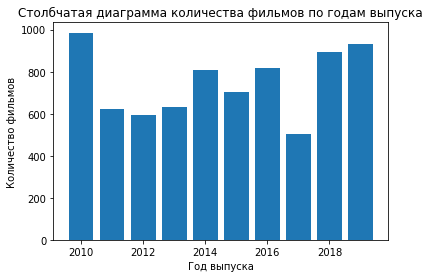

In [45]:
# Получение количества фильмов для каждого года выпуска
counts = mkrf_movies['film_release_year'].value_counts()

# Создание столбчатой диаграммы
plt.bar(counts.index, counts.values)

# Настройка осей и заголовка диаграммы
plt.xlabel('Год выпуска')
plt.ylabel('Количество фильмов')
plt.title('Столбчатая диаграмма количества фильмов по годам выпуска')

# Показать диаграмму
plt.show()

- Года 2014, 2016, 2018 и 2019 имеют наибольшее количество выпущенных фильмов среди представленных данных. Это может свидетельствовать о пике активности в кинематографической индустрии в этих годах или о наличии факторов, стимулирующих выпуск фильмов.

- 2010 год  имеет самое высокое количество выпущенных фильмов среди всех представленных данных (985 фильмов).

**Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.**

In [46]:
# Шаг 1: Расчет общей суммы сборов всех фильмов
#total_box_office = mkrf_movies["box_office"].sum()

# Шаг 2: Расчет суммы сборов для фильмов с указанной информацией о прокате
#films_with_box_office = mkrf_movies[mkrf_movies["box_office"].notnull()]
#box_office_with_info = films_with_box_office["box_office"].sum()

# Шаг 3: Расчет доли фильмов с указанной информацией о прокате
#share_with_info = box_office_with_info / total_box_office

#print(f"Доля фильмов с указанной информацией о прокате в кинотеатрах: {share_with_info:.2%}")

In [47]:
share = pd.pivot_table(mkrf_movies, 
               index=["film_release_year"], 
               values=["puNumber", "box_office"], 
               aggfunc='count')
share['procent'] = share['box_office'] / share['puNumber'] * 100
share.rename(columns = {'puNumber':'total_cinema', 'box_office':'cinema_box_office'}, inplace = True )
display(share)

,cinema_box_office,total_cinema,procent
film_release_year,,,
2010,105,985,10.659898
2011,109,622,17.524116
2012,128,593,21.585160
2013,184,630,29.206349
2014,279,806,34.615385
2015,465,705,65.957447
2016,526,818,64.303178
2017,357,505,70.693069
2018,475,891,53.310887


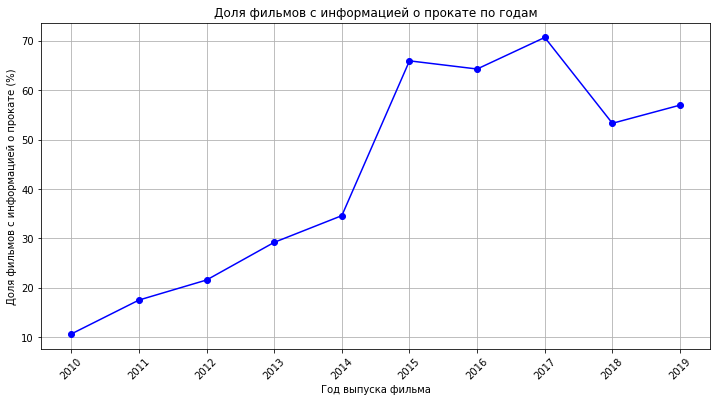

In [48]:
# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(share.index, share['procent'], marker='o', linestyle='-', color='b')
plt.xlabel('Год выпуска фильма')
plt.ylabel('Доля фильмов с информацией о прокате (%)')
plt.title('Доля фильмов с информацией о прокате по годам')
plt.grid(True)
plt.xticks(share.index, rotation=45)
plt.show()

**В данной выборке мы наблюдаем неоднородность данных. Отмечается, что с 2010 по 2014 годы было показано меньше всего фильмов в кинотеатрах. Однако доля таких фильмов колеблется от 10% до 34%, что говорит о том, что их наличие не пропорционально низкому количеству показов. Например, в 2019 году замечается самое большое количество кинопоказов в кинотеатрах, несмотря на то, что доля таких фильмов за этот год не является самой высокой по сравнению с другими годами. Таким образом, нельзя сделать однозначные выводы о количестве кинопоказов и их динамике.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [49]:
dinamicks = pd.pivot_table(mkrf_movies, 
               index=["film_release_year"], 
               values=["box_office"], 
               aggfunc='sum')
display(dinamicks)

,box_office
film_release_year,
2010,2.428654e+06
2011,1.410276e+07
2012,6.955423e+06
2013,2.979971e+07
2014,7.444952e+09
2015,3.949737e+10
2016,4.786630e+10
2017,4.856371e+10
2018,4.966840e+10


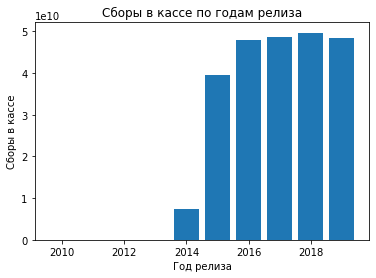

In [50]:
plt.bar(dinamicks.index, dinamicks['box_office'])
plt.xlabel('Год релиза')
plt.ylabel('Сборы в кассе')
plt.title('Сборы в кассе по годам релиза')
plt.show()

**Исходя из предоставленных данных, можно сделать следующие выводы о динамике проката по годам:**
- С 2014 года произошел резкий скачок в сумме сборов в кассе, который продолжался до 2019 года.
- В период с 2015 по 2019 год сумма сборов в кассе значительно выросла и достигла своего пика в 2018 году, после чего начала незначительно снижаться.
- Минимальная сумма сборов была в 2010 году, составляя 2.43 миллиона рублей.
- Максимальная сумма сборов была в 2018 году, составляя 49.68 миллиардов рублей.
- Таким образом, можно сказать, что в данных представлен тренд на постепенный рост суммы сборов в кассе с 2010 года до 2018 года, после чего наблюдается незначительное снижение в 2019 году.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [51]:
dinamicks = pd.pivot_table(mkrf_movies, 
               index=["film_release_year"], 
               values=["box_office"], 
               aggfunc=['mean', 'median'])
display(dinamicks)

,mean,median
,box_office,box_office
film_release_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.433924e+04,5660.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.100057e+07,3846679.410
2017,1.360328e+08,9968340.000


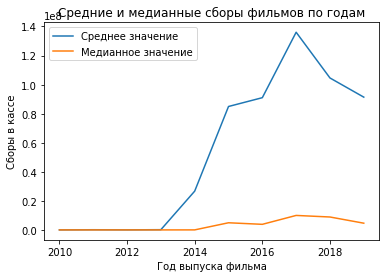

In [52]:
fig, ax = plt.subplots()
years = dinamicks.index.get_level_values(0)
mean_box_office = dinamicks[('mean', 'box_office')]
median_box_office = dinamicks[('median', 'box_office')]
ax.plot(years, mean_box_office, label='Среднее значение')
ax.plot(years, median_box_office, label='Медианное значение')
ax.set_xlabel('Год выпуска фильма')
ax.set_ylabel('Сборы в кассе')
ax.set_title('Средние и медианные сборы фильмов по годам')
ax.legend()
plt.show()

**Видно, что данные о сборах в кассе фильмов имеют значительный разброс, что подтверждается разницей между средним и медианным значением. Это указывает на наличие некоторых фильмов с крайне высокими сборами в сравнении с остальными. Однако, в идустрии кино такой разброс является нормой.**

**Когда рассматривается общая тенденция, можно заметить, что год с наибольшими сборами в кассе был 2017 год. Это подтверждается и средним значением, и медианой.**

**Таким образом, можно сделать вывод, что в киноиндустрии существуют фильмы, которые достигают огромных сборов, а некоторые годы выделяются особенно высокими показателями.**

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

In [53]:
age = pd.pivot_table(mkrf_movies.query('2015 <= film_release_year'), 
               index=["age_restriction"], 
               values=["box_office"], 
               aggfunc=['sum'])
age.columns = age.columns.droplevel()
display(age)

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,8.090774e+08
«12+» - для детей старше 12 лет,6.061945e+10
«16+» - для детей старше 16 лет,7.603473e+10
«18+» - запрещено для детей,4.075962e+10
«6+» - для детей старше 6 лет,5.579861e+10


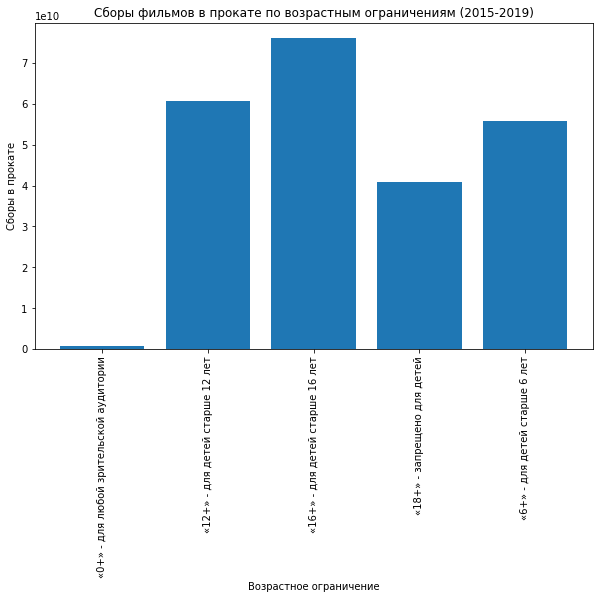

In [54]:
plt.figure(figsize=(10, 6))
plt.bar(age.index, age['box_office'])
plt.title('Сборы фильмов в прокате по возрастным ограничениям (2015-2019)')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Сборы в прокате')
plt.xticks(rotation=90) 
plt.show()

В период с 2015 по 2019 год больше всего собрали денег в прокате фильмы с ограничением «16+» - для детей старше 16 лет.

_**Посмотрим меняется ли картина в зависимости от года:**_

In [55]:
age = pd.pivot_table(mkrf_movies.query('2015 <= film_release_year'), 
               index=["film_release_year", "age_restriction"], 
               values=["box_office"], 
               aggfunc=['sum'])

age = age.reset_index()  # Сбросим индексы для получения столбцов "film_release_year", "age_restriction" и "sum"
age.columns = age.columns.droplevel(0)  # Удаление многоуровневых заголовков столбцов
age.columns = ['Film Release Year', 'Age Restriction', 'Box Office']  # Переименование столбцов

display(age)

,Film Release Year,Age Restriction,Box Office
0,2015,«0+» - для любой зрительской аудитории,3.790546e+08
1,2015,«12+» - для детей старше 12 лет,1.361608e+10
2,2015,«16+» - для детей старше 16 лет,1.136812e+10
3,2015,«18+» - запрещено для детей,5.432308e+09
4,2015,«6+» - для детей старше 6 лет,8.701799e+09
5,2016,«0+» - для любой зрительской аудитории,1.502288e+08
6,2016,«12+» - для детей старше 12 лет,1.220445e+10
7,2016,«16+» - для детей старше 16 лет,1.666455e+10
8,2016,«18+» - запрещено для детей,6.793930e+09
9,2016,«6+» - для детей старше 6 лет,1.205315e+10


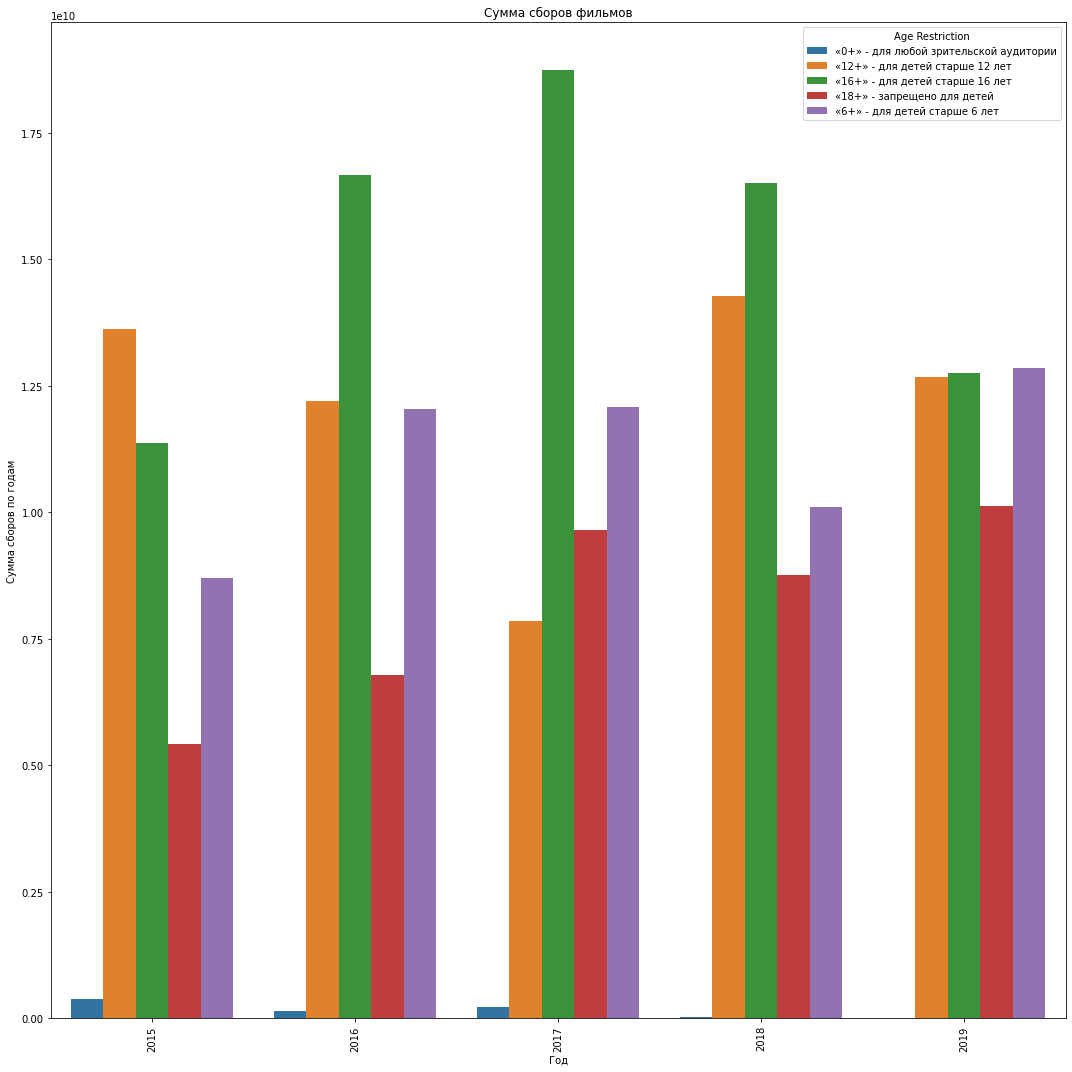

In [56]:
# Построение столбчатого графика
plt.figure(figsize=(15, 15))
sns.barplot(x='Film Release Year', y='Box Office', hue='Age Restriction', data=age)

plt.title('Сумма сборов фильмов')
plt.xlabel('Год')
plt.ylabel('Сумма сборов по годам')

plt.xticks(rotation=90) 
plt.tight_layout() 

plt.legend(title='Age Restriction')
plt.show()

Объяснение того, что фильмы с возрастным ограничением "16+" лидируют по сборам практически каждый год, может быть связано с несколькими факторами:

Целевая аудитория: Фильмы с возрастным ограничением "16+" могут привлекать более широкую и старшую аудиторию, которая, вероятно, готова потратить больше денег на билеты и посещение кинотеатров.

Качество контента: Фильмы с возрастным ограничением "16+" могут предлагать содержание, которое более привлекательно для зрителей, включая более сложные сюжеты, более высокий уровень интриги и эмоциональную насыщенность, что может привлечь больше зрителей и увеличить сборы.

Популярность жанров: Фильмы с возрастным ограничением "16+" могут представлять популярные жанры, такие как боевики, триллеры, фантастика, которые имеют большую привлекательность для широкой аудитории и могут привести к большему успеху в кассовых сборах.

Относительно 2015 года, когда фильмы с возрастным ограничением "12+" были лидерами по сборам, это может быть связано с наличием популярных франшиз, которые выпустили фильмы с таким ограничением. К тому времени фильмы, относящиеся к таким франшизам, уже завоевали популярность среди широкой аудитории и имели предыдущие части или адаптации, что могло привести к большому успеху в сборах.

Относительно 2019 года, когда фильмы с возрастным ограничением "6+" были лидерами по сборам, это может быть связано с наличием успешных фильмов, ориентированных на семейную аудиторию и детей. Фильмы с возрастным ограничением "6+" могут привлекать широкую аудиторию, включая детей и их родителей, что может привести к высоким кассовым сборам.

В целом, успех фильмов с определенными возрастными ограничениями может быть связан с комбинацией целевой аудитории, качества контента, популярности жанров и наличием популярных фильмов или франшиз в определенных годах.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

_**Для исследования фильмов, получивших государственную поддержку выделим их в отдельный DataFrame**_

In [57]:
data_copy = mkrf_movies[mkrf_movies['budget'].notna()].copy()
display(data_copy)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget
1281,Пока еще жива,111005313.0,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703
1448,Бесславные придурки,111003314.0,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000
1498,Невидимки,111004213.0,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691
1524,БЕРЦЫ,111004314.0,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095
1792,Братья Ч,111004414.0,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019.0,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,400000000.0,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204
7466,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,0.0,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316
7474,Вторжение,111022519.0,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,400000000.0,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661
7476,Я свободен,111023019.0,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,30000000.0,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998


Создадим столбец с доходностью фильма: 

In [58]:
data_copy['income'] = data_copy['box_office'] - data_copy['budget']

In [59]:
display(data_copy)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget,income
1281,Пока еще жива,111005313.0,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,79411900.0,Министерство культуры,8.1,"драма,мелодрама",3.653536e+05,2013,А.Атанесян,драма,0.333703,-7.904655e+07
1448,Бесславные придурки,111003314.0,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,37142857.0,Министерство культуры,NaN,NaN,2.814000e+04,2014,А.Якимчук,NaN,0.700000,-3.711472e+07
1498,Невидимки,111004213.0,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,176023490.0,Фонд кино,5.3,"комедия,фантастика",1.995703e+07,2013,Р.Давлетьяров,комедия,0.612691,-1.560665e+08
1524,БЕРЦЫ,111004314.0,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,40574140.0,Министерство культуры,4.2,драма,5.591750e+04,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.690095,-4.051822e+07
1792,Братья Ч,111004414.0,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,40015122.0,Министерство культуры,6.4,драма,2.321000e+05,2014,М.Угаров,драма,0.624764,-3.978302e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019.0,2019-12-26 12:00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.0,...,980000000.0,Фонд кино,6.0,"история,биография,драма",7.177032e+08,2019,А.Кравчук,история,0.510204,-2.622968e+08
7466,Иван Царевич и Серый Волк 4,114005019.0,2019-12-20 12:00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.0,...,190000000.0,Фонд кино,6.7,"мультфильм,приключения,семейный",5.010692e+08,2019,Д.Шмидт,мультфильм,0.526316,3.110692e+08
7474,Вторжение,111022519.0,2019-12-23 12:00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.0,...,944000000.0,Фонд кино,5.7,"фантастика,боевик",NaN,2019,Ф.Бондарчук,фантастика,0.529661,NaN
7476,Я свободен,111023019.0,2019-12-26 12:00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,46154000.0,Министерство культуры,5.9,драма,NaN,2019,И.Северов,драма,0.649998,NaN


Обратим внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 

_**Посмотрим, сколько выделяют средств на кино с государственной поддержкой:**_

In [60]:
data_copy['budget'].describe()

count    3.320000e+02
mean     1.314224e+08
std      1.871482e+08
min      6.000000e+06
25%      4.552480e+07
50%      7.119690e+07
75%      1.500000e+08
max      2.305074e+09
Name: budget, dtype: float64

<AxesSubplot:>

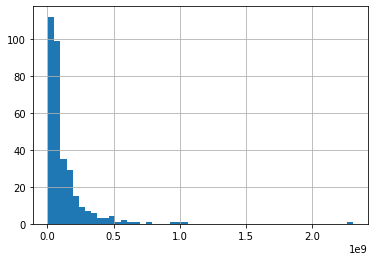

In [61]:
data_copy['budget'].hist(bins=50) 

Если судить по медианному значению, то на государственные фильмы приходится 71196900  (семьдесят один миллион рублей) бюджетных средств.

_**Посмотрим какие сборы у фильмов с государственной поддержкой:**_

In [62]:
data_copy['box_office'].describe()

count    3.180000e+02
mean     1.324324e+08
std      3.348379e+08
min      1.550000e+03
25%      1.236676e+06
50%      1.572007e+07
75%      1.063730e+08
max      3.073569e+09
Name: box_office, dtype: float64

В среднем - 132 миллиона рублей.

_**Проверим, хорошо ли окупаются такие фильмы в целом:**_


Для этого мы выше создали столбец income - показатель доходности фильма.

In [63]:
data_copy['income'].describe()

count    3.180000e+02
mean     4.256980e+05
std      3.159104e+08
min     -1.971477e+09
25%     -7.069443e+07
50%     -4.068082e+07
75%     -2.362182e+06
max      2.913569e+09
Name: income, dtype: float64

Если судить по среднему значению фильмы имеют  прибыль в 425 тысяч рублей, но по описанию данных так же видно, что больше 75% фильмов убыточно. Это можно объяснить тем, что есть фильмы, которые имеют огромную кассу сборов и перебивают убытки остальных.

_**Посмотрим на "лидера" и "антилидера" проката за бюджетные средства:**_

In [64]:
data_copy['income'].max()

2913568690.79

In [65]:
data_copy[data_copy['income'] == 2913568690.79]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget,income
7456,Холоп,111021719.0,2019-12-19 12:00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.0,...,160000000.0,Фонд кино,6.8,комедия,3.073569e+09,2019,К.Шипенко,комедия,0.375,2.913569e+09


Фильм "Холоп" очевидно является лидером проката, собрав в прокате почти 3 миллиарда рублей выручкой. 

In [66]:
data_copy['income'].min()

-1971477243.41

In [67]:
data_copy[data_copy['income'] == -1971477243.41]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget,income
7114,Тайна Печати Дракона,111012819.0,2019-09-12 12:00:00,Художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.0,...,2.305074e+09,Фонд кино,5.8,"приключения,фэнтези",3.335971e+08,2019,О.Степченко,приключения,0.117133,-1.971477e+09


А вот полный "провал" в прокате у фильма "Тайна Печати Дракона", он убыточный почти на 2 миллиарда рублей.  

_**Посмотрим какой рейтинг у фильмов с государственной поддержкой:**_

In [68]:
data_copy['ratings'].describe()

count    316.000000
mean       6.020886
std        1.148943
min        1.000000
25%        5.300000
50%        6.200000
75%        6.700000
max        9.400000
Name: ratings, dtype: float64

Медианное значение почти совпадает со средним. Можно сказать, что такие фильмы у пользователей заслуживают твердой 6, это неплохой показатель для подобных фильмов. 

In [69]:
data_copy[data_copy['ratings'] == 1.0]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget,income
3515,Взломать блогеров,111016616.0,2016-10-28 12:00:00,Художественный,"ООО ""ТаББаК""",Россия,М.Свешников,Т.Бекмамбетов,«6+» - для детей старше 6 лет,0.0,...,36016269.0,Фонд кино,1.0,"комедия,мультфильм,фантастика",7323648.0,2016,М.Свешников,комедия,0.694131,-28692621.0


Самую низкую оценку имеет фильм - "Взломать блогеров", принесший еще и убытков на 28 миллионов рублей. 

In [70]:
data_copy[data_copy['ratings'] == 9.4]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget,income
2146,Главный,111003415.0,2015-03-27 12:00:00,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,...,40000000.0,Министерство культуры,9.4,"фантастика,боевик,комедия",334750.0,2015,Ю.Кара,фантастика,0.25,-39665250.0


А больше всего зрители оценили кинокартину - "Главный". На удивление, тоже является убыточным на 39 миллионов(при бюджете в 40 миллионов). Это можно попробовать объяснить тем, что картина осталась "незамеченной" в прокате, а оценки ставили только зрители, кто добрался до просмотра и остались только под хорошим впечатлением.

In [71]:
data_copy_non_budget = mkrf_movies[mkrf_movies['budget'].isna() == True].copy()
data_copy_non_budget = data_copy_non_budget[data_copy_non_budget['production_country'] == 'Россия']
display(data_copy_non_budget)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,film_release_year,general_director,general_genres,share_total_budget
336,Каникулы строгого режима,111008514.0,2014-08-07 12:00:00,Художественный,"ООО ""Кинобазза"" по заказу ЗАО ""Дирекция Кино""",Россия,И.Зайцев,"А.Максимов, Н.Попов, Д.Файзиев",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,комедия,приключения",360.0,2014,И.Зайцев,драма,NaN
462,Август. Восьмого,111000612.0,2012-02-07 12:00:00,Художественный,"ЗАО ""ПК ""ГЛАВКИНО""",Россия,Д.Файзиев,"Д.Файзиев, Ф.Бондарчук, И.Бачурин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.1,"драма,военный",6775.0,2012,Д.Файзиев,драма,NaN
463,Тот еще...!,111001612.0,2012-02-20 12:00:00,Художественный,"ООО ""Энджой мувиз""",Россия,С.Андреасян,Г.Малков,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,2.6,"фэнтези,комедия,семейный",12779.0,2012,С.Андреасян,фэнтези,NaN
464,КОКОКО,111003112.0,2012-06-05 12:00:00,Художественный,"ООО Кинокомпания ""Глобус-фильм""",Россия,А.Смирнова,С.Сельянов,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.9,"драма,комедия",200.0,2012,А.Смирнова,драма,NaN
469,Разговор,111000712.0,2012-02-07 12:00:00,Художественный,"ООО ""Кинокомпания ""КВФильм-Продакшн"", ООО ""Ком...",Россия,"В.Иванов, С.Комаров",В.Карев,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"триллер,драма,детектив",NaN,2012,В.Иванов,триллер,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,Fair play (Честная игра),211055919.0,2019-12-17 12:00:00,Художественный,ИП Сигал Екатерина Тенгизовна,Россия,Д.Кудрявцев,Е.Сигал,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"боевик,триллер,драма",NaN,2019,Д.Кудрявцев,боевик,NaN
7467,Жёлтый клевер,111022219.0,2019-12-27 12:00:00,Художественный,Соломатина Людмила Леонидовна,Россия,Л.Соломатина (Томилова),Л.Соломатина (Томилова),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Л.Соломатина (Томилова),NaN,NaN
7470,Дикие и свободные,112004819.0,2019-12-23 12:00:00,Документальный,"АНО ""ТВ-Новости""",Россия,Н.Карачкова,В.Сенина,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Н.Карачкова,NaN,NaN
7475,Папа,111022919.0,2019-12-24 12:00:00,Художественный,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",Россия,К.Чувикова,"ООО ""Киношкола имени Сергея Федоровича Бондарч...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.2,драма,NaN,2019,К.Чувикова,драма,NaN


_**Посмотрим какой рейтинг у фильмов без государственной поддержки:**_

In [72]:
data_copy_non_budget['ratings'].describe()

count    997.000000
mean       6.178837
std        1.437187
min        1.100000
25%        5.400000
50%        6.400000
75%        7.200000
max        9.900000
Name: ratings, dtype: float64

**Можно сказать, что рейтинг фильмов без госудерственной поддержки почти не отличается от фильмов с ней.**

_**Посмотрим какие сборы у фильмов без государственной поддержки:**_

In [73]:
data_copy_non_budget['box_office'].describe()

count    4.750000e+02
mean     2.124166e+07
std      1.075253e+08
min      0.000000e+00
25%      5.380000e+03
50%      8.791100e+04
75%      2.933461e+06
max      1.682680e+09
Name: box_office, dtype: float64

Даже если будем так же судить по среднему значению - то это чуть больше 21 миллиона рублей. Что в разы меньше сборов чем у фильмов с государственной поддержкой. Но мы не знаем бюджета этих фильмов, поэтому невозможно оценить окупаемость данной категории фильмов и сравнить их.

### Шаг 5. Напишите общий вывод

- Исправили типы данных у некоторых столбцов для правильного отображения и корректными операциями над ними.

- Изучили пропуски в DataFrame.  Объяснили, почему заполнили пропуски определённым образом или почему не стали этого делать.

- Проверили, есть ли в данных дубликаты. Описали причины, которые могли повлиять на появление дублей.

- Изучили категориальные значения. Посмотрели, какая общая проблема встречается почти во всех категориальных столбцах, исправили проблемные значения.

- Проверили количественные значения. Проверили в столбцах подозрительные данные. Исправили фильмы с нулевым общим бюджетом так, чтобы он состоял из двух частей: возвратных и невозвратных средств государственной поддержки.



**Провели исследовательский анализ данных и пришли к следующим выводам:**
- Года 2014, 2016, 2018 и 2019 имеют наибольшее количество выпущенных фильмов среди представленных данных. Это может свидетельствовать о пике активности в кинематографической индустрии в этих годах или о наличии факторов, стимулирующих выпуск фильмов.
- 2010 год имеет самое высокое количество выпущенных фильмов среди всех представленных данных (985 фильмов).
- С 2014 года произошел резкий скачок в сумме сборов в кассе, который продолжался до 2019 года.
- В период с 2015 по 2019 год сумма сборов в кассе значительно выросла и достигла своего пика в 2018 году, после чего начала незначительно снижаться.
- Минимальная сумма сборов была в 2010 году, составляя 2.43 миллиона рублей.
- Максимальная сумма сборов была в 2018 году, составляя 49.68 миллиардов рублей.
- В киноиндустрии существуют фильмы, которые достигают огромных сборов, а некоторые годы выделяются особенно высокими показателями.
- Успех фильмов с определенными возрастными ограничениями может быть связан с комбинацией целевой аудитории, качества контента, популярности жанров и наличием популярных фильмов или франшиз в определенных годах.



**Исследовали фильмы с государственной поддержкой и пришли к следующим выводам:**
- Если судить по медианному значению, то на государственные фильмы приходится 71196900 (семьдесят один миллион рублей) бюджетных средств.
- Если судить по среднему значению фильмы имеют прибыль в 425 тысяч рублей, но по описанию данных так же видно, что больше 75% фильмов убыточно. Это можно объяснить тем, что есть фильмы, которые имеют огромную кассу сборов и перебивают убытки остальных.
- Фильм "Холоп" очевидно является лидером проката, собрав в прокате почти 3 миллиарда рублей выручкой.
- А вот полный "провал" в прокате у фильма "Тайна Печати Дракона", он убыточный почти на 2 миллиарда рублей.
- Можно сказать, что  фильмы у пользователей заслуживают твердых 6 баллов в оценке рейтинга, это неплохой показатель для подобных фильмов.
- Также пришли к выводу, что не всегда хороший рейтинг говорит об окупаемости фильма. 
- Можно сказать, что рейтинг фильмов без госудерственной поддержки почти не отличается от фильмов с ней.